In [1]:
!git clone https://github.com/KHiMAeRA05/PMLDL_movie_recommender_system

Cloning into 'PMLDL_movie_recommender_system'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 57 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), 2.82 MiB | 2.94 MiB/s, done.


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
!cd /kaggle/working/PMLDL_movie_recommender_system

In [15]:
# Load the MovieLens 100K dataset
df_users = pd.read_csv('/kaggle/working/PMLDL_movie_recommender_system/data/raw/ml-100k/u.user', 
                        sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])
df_ratings = pd.read_csv('/kaggle/working/PMLDL_movie_recommender_system/data/raw/ml-100k/u.data', 
                        sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
df_movies = pd.read_csv('/kaggle/working/PMLDL_movie_recommender_system/data/raw/ml-100k/u.item', 
                        sep='|', names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDB_URL',
                                       'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                                       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                                       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')

# Display basic information about the datasets

In [22]:
# User Dataset
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [23]:
# Ratings Dataset
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [25]:
# Movies Dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDB_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children            1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

# Display the first few rows of each dataset

In [26]:
# First few rows of Users Dataset
df_users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [27]:
# First few rows of Ratings Dataset
df_ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [28]:
# First few rows of Movies Dataset
df_movies.head()

,movie_id,title,release_date,video_release_date,IMDB_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Explore statistical summary of numerical columns

In [29]:
# Summary Statistics of Users Dataset
df_users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [30]:
# Summary Statistics of Ratings Dataset
df_ratings.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


# Visualize datasets' distributions

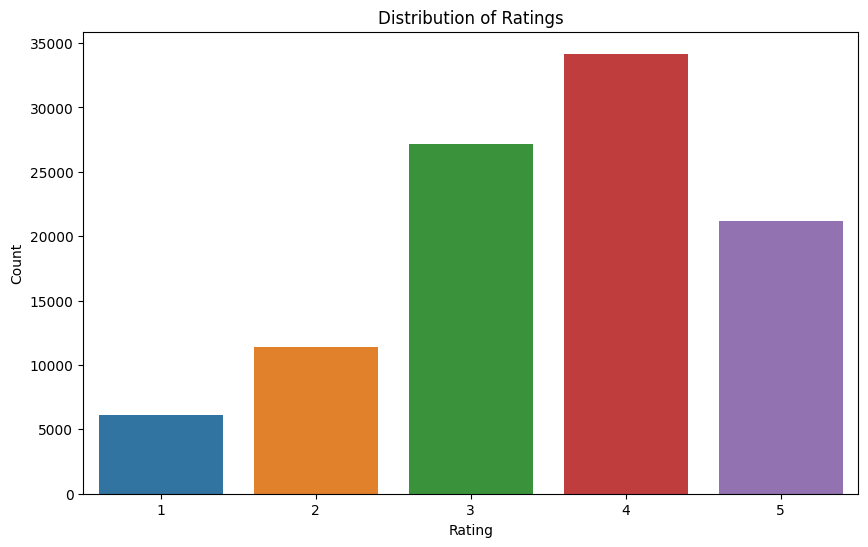

In [19]:
# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

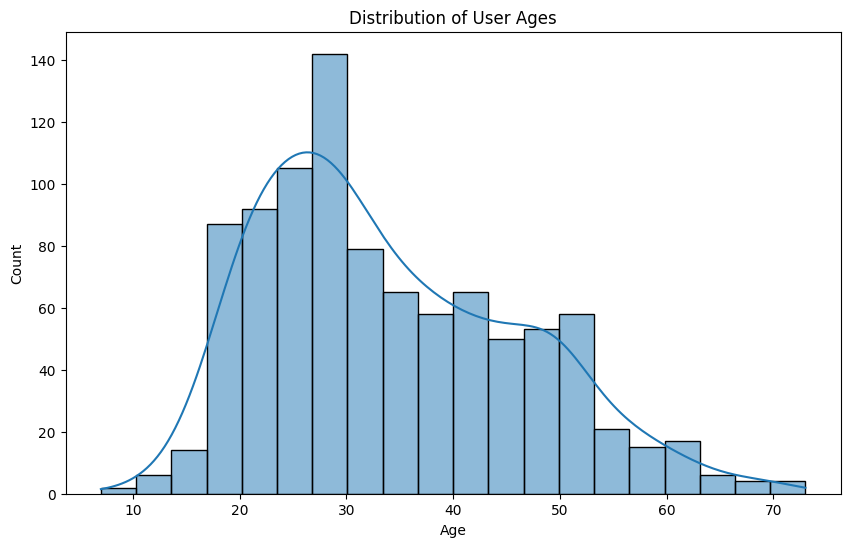

In [20]:
# Visualize the distribution of user ages
plt.figure(figsize=(10, 6))
sns.histplot(df_users['age'], bins=20, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

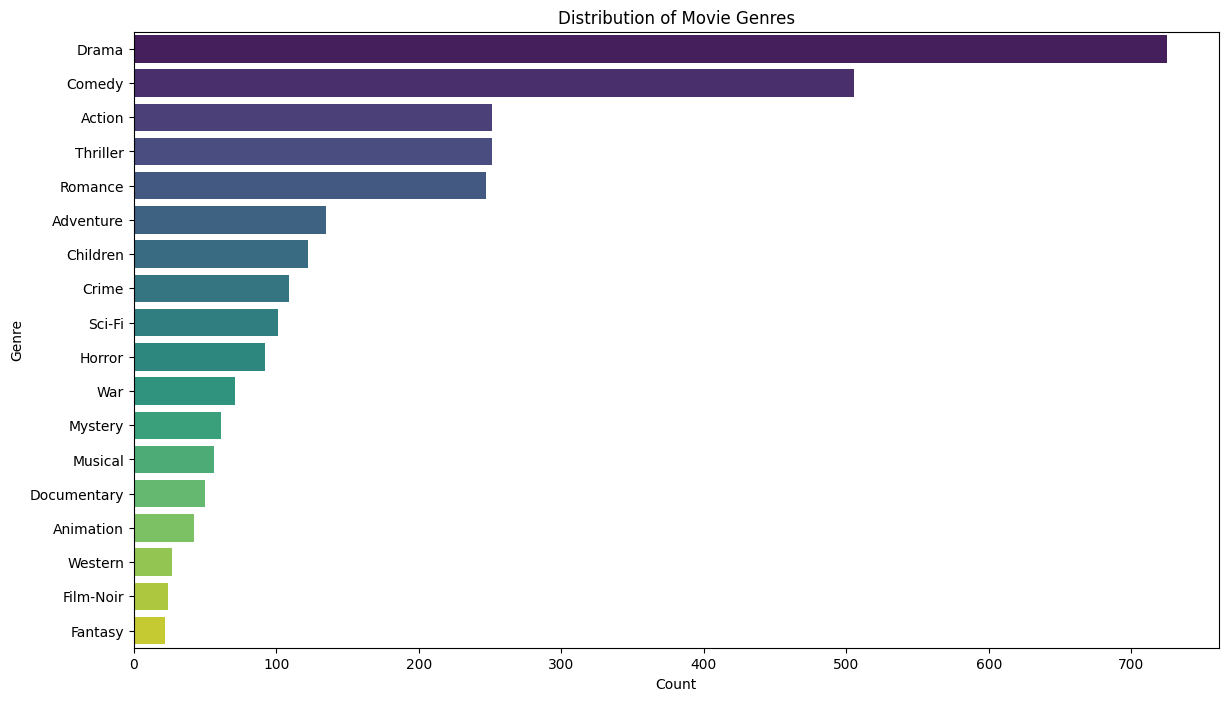

In [21]:
# Visualize the distribution of movie genres
genre_columns = df_movies.columns[6:]
genre_counts = df_movies[genre_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [43]:
# Merge the ratings and movies dataframes
df_merged = pd.merge(df_ratings, df_movies[['movie_id', 'title']], on='movie_id')

# Calculate the average rating for each movie
average_ratings = df_merged.groupby('title')['rating'].mean().sort_values(ascending=False)

# Create a table of top films sorted alphabetically
top_films_table = pd.DataFrame({
    'Movie Title': average_ratings.index,
    'Average Rating': average_ratings.values
})

# Sort the table alphabetically by movie title
top_films_table = top_films_table.sort_values(by=['Average Rating', 'Movie Title'], ascending=[False, True])

# Display the table
top_films_table.head(10)

,Movie Title,Average Rating
6,Aiqing wansui (1994),5.0
9,Entertaining Angels: The Dorothy Day Story (1996),5.0
5,"Great Day in Harlem, A (1994)",5.0
1,Marlene Dietrich: Shadow and Light (1996),5.0
8,Prefontaine (1997),5.0
2,"Saint of Fort Washington, The (1993)",5.0
7,Santa with Muscles (1996),5.0
3,Someone Else's America (1995),5.0
4,Star Kid (1997),5.0
0,They Made Me a Criminal (1939),5.0
